### **Start**

Documentations of all the packages used:

pandas: https://pandas.pydata.org/docs/#module-pandas

numpy: https://numpy.org/doc/stable/

matplotlib: https://matplotlib.org/stable/index.html

seaborn: https://seaborn.pydata.org/tutorial.html

openpyxl: So, that we can create excel file

Importing the packages for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import tempfile
import shutil
import filecmp

**Load the Dataset**

In [2]:
df = pd.read_csv("../data/weather.csv") 
df.head()

,msl,sst,u10,v10,ws,t2m,rh,tp
0,101039.109583,28.272592,1.037604,0.896062,1.939804,26.803986,73.887538,0.103950
1,100965.890833,28.272828,0.194436,-0.214739,1.141202,25.138509,83.937153,0.001431
2,101071.947917,28.273067,0.558675,0.170728,1.734705,26.279419,74.863584,0.103950
3,101039.702917,28.273300,0.808412,-2.010220,2.622524,25.128418,84.040394,0.000000
4,101117.802083,28.273533,0.717091,0.712622,2.136153,26.743073,72.330746,0.000000


**Overview of the Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   msl     14610 non-null  float64
 1   sst     14610 non-null  float64
 2   u10     14610 non-null  float64
 3   v10     14610 non-null  float64
 4   ws      14610 non-null  float64
 5   t2m     14610 non-null  float64
 6   rh      14610 non-null  float64
 7   tp      14610 non-null  float64
dtypes: float64(8)
memory usage: 913.3 KB


**Statistical Summary**

In [4]:
df.describe()

,msl,sst,u10,v10,ws,t2m,rh,tp
count,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000
mean,100985.079084,28.422049,1.379612,-0.451341,2.688491,27.000180,80.558849,3.819466
std,185.157047,0.368533,1.413057,1.531852,1.030328,1.396966,9.551116,7.305492
min,99929.515833,27.233627,-4.472890,-5.592687,0.434314,23.509745,35.901333,0.000000
25%,100860.687708,28.152728,0.471266,-1.482232,1.972784,25.882952,75.114893,0.000954
50%,100986.858750,28.373905,1.273357,-0.531580,2.499795,26.822774,82.273711,0.715017
75%,101113.774271,28.708128,2.139928,0.449842,3.219862,28.046560,88.505871,4.554391
max,101641.328750,29.422017,8.540370,8.158190,8.786980,31.831116,94.476847,128.652096


Columns

In [5]:
df.columns

Index(['msl', 'sst', 'u10', 'v10', 'ws', 't2m', 'rh', 'tp'], dtype='object')

**Taking any one column**

In [6]:
df['msl']

0        101039.109583
1        100965.890833
2        101071.947917
3        101039.702917
4        101117.802083
             ...      
14605    100973.963333
14606    100937.531250
14607    100930.057083
14608    101036.900417
14609    101035.006250
Name: msl, Length: 14610, dtype: float64

In [7]:
df.isnull().sum()

msl    0
sst    0
u10    0
v10    0
ws     0
t2m    0
rh     0
tp     0
dtype: int64

In [8]:
def save_dataframe_to_excel(df, filename, sheet_name="Sheet1"):
    """
    Save DataFrame to Excel.
    - Writes to a temporary file first
    - Only replaces the original if content changed
    - Prevents Excel from always showing 'M' when open
    """
    # Create a temporary file
    tmp_fd, tmp_path = tempfile.mkstemp(suffix=".xlsx")
    os.close(tmp_fd)

    # Save to temporary file
    df.to_excel(tmp_path, sheet_name=sheet_name)

    # If file doesn't exist, move directly
    if not os.path.exists(filename):
        shutil.move(tmp_path, filename)
        print(f"Saved new file: {filename}")
        return

    # Compare with existing file
    if filecmp.cmp(tmp_path, filename, shallow=False):
        os.remove(tmp_path)
        print("No changes detected. Skipping overwrite.")
    else:
        shutil.move(tmp_path, filename)
        print(f"Updated file: {filename}")

#### Calculate the mean and variance

In [9]:
df.mean()

msl    100985.079084
sst        28.422049
u10         1.379612
v10        -0.451341
ws          2.688491
t2m        27.000180
rh         80.558849
tp          3.819466
dtype: float64

In [10]:
df.var()

msl    34283.132106
sst        0.135817
u10        1.996730
v10        2.346571
ws         1.061575
t2m        1.951513
rh        91.223815
tp        53.370214
dtype: float64

Mean and Variance saved as a Excel file

In [11]:
mean_var = pd.DataFrame({'Mean': df.mean(), 'Variance': df.var()})
save_dataframe_to_excel(mean_var, "../reports/information/mean_variance.xlsx")

Updated file: ../reports/information/mean_variance.xlsx


# Exploratory Data Analysis

### Histograms
Here the histograms shows how often the value has appeared in each column

Pandas Histogram: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

Some new functions:

tight_layout: This adjusts the graph such that they do not overlap. Link: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html


<Figure size 1200x1000 with 0 Axes>

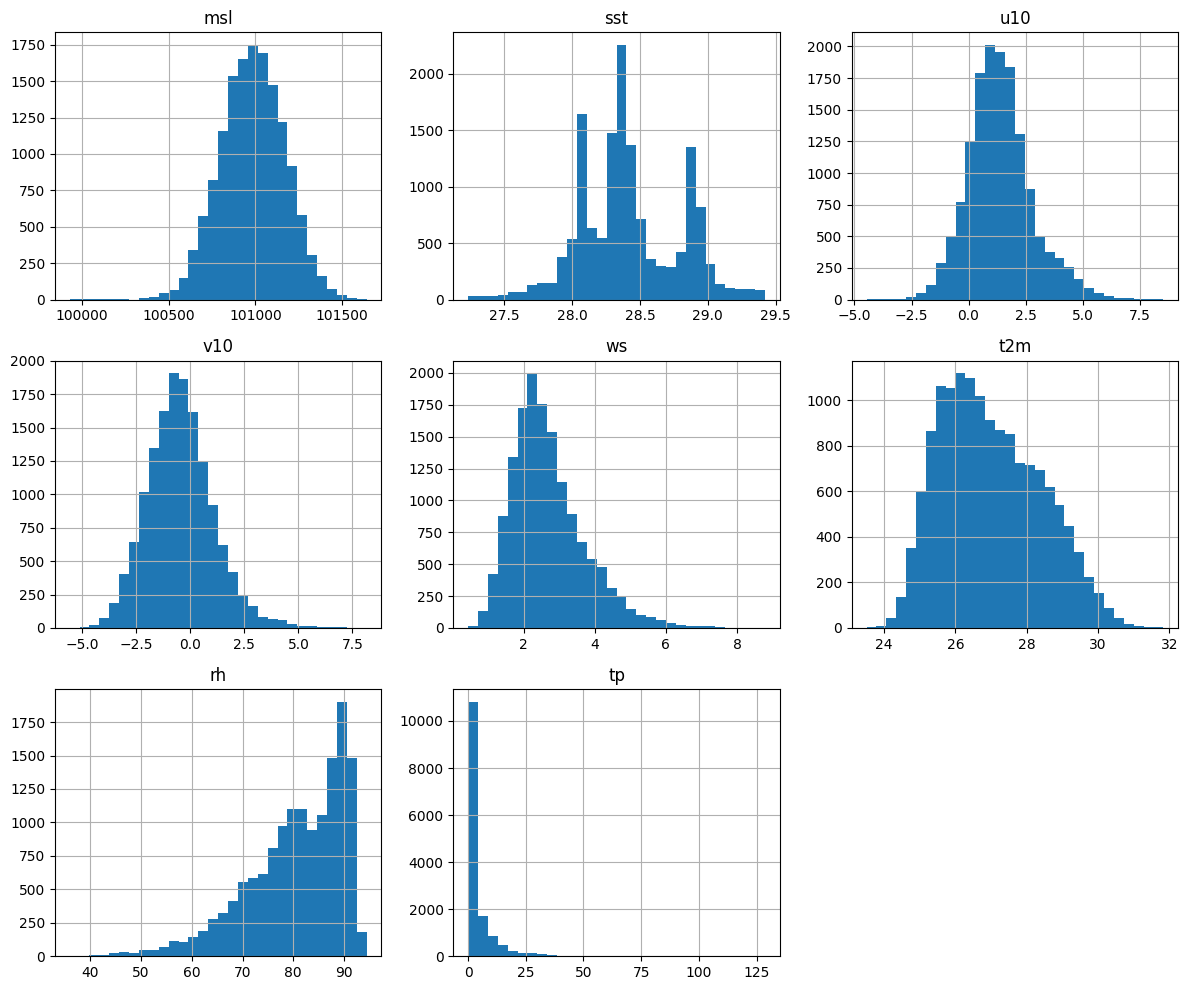

In [12]:
plt.figure(figsize=(12,10))
df.hist(figsize=(12,10), bins=30)
plt.tight_layout()
plt.savefig('../reports/graphs/histograms/histogram.png', dpi=300)
plt.show()

### BoxPlots

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Link: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [13]:
for col in df.columns:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    filename = f'../reports/graphs/boxplots/boxplot_{col}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

### Correlation Matrix (HeatMap)

Correlation Matrix: A correlation matrix is a table that shows how strongly each feature in a dataset is related to the others. It helps us understand if changes in one column are associated with changes in another column. We must use corr(). Link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

Heatmap: A heatmap is a visual way to show data where values are represented as colors. It is especially useful for showing a correlation matrix, because you can quickly see which variables are strongly related. Link:https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [14]:
corr = df.corr()
corr

,msl,sst,u10,v10,ws,t2m,rh,tp
msl,1.000000,-0.002169,-0.340085,-0.097398,-0.300863,0.042831,-0.406913,-0.375390
sst,-0.002169,1.000000,-0.066650,0.064768,-0.042924,-0.049575,0.100645,0.043174
u10,-0.340085,-0.066650,1.000000,-0.175921,0.642556,-0.155446,0.363828,0.404339
v10,-0.097398,0.064768,-0.175921,1.000000,-0.048750,-0.089442,0.141030,0.270461
ws,-0.300863,-0.042924,0.642556,-0.048750,1.000000,-0.087429,0.072250,0.403416
t2m,0.042831,-0.049575,-0.155446,-0.089442,-0.087429,1.000000,-0.595527,-0.404319
rh,-0.406913,0.100645,0.363828,0.141030,0.072250,-0.595527,1.000000,0.461742
tp,-0.375390,0.043174,0.404339,0.270461,0.403416,-0.404319,0.461742,1.000000


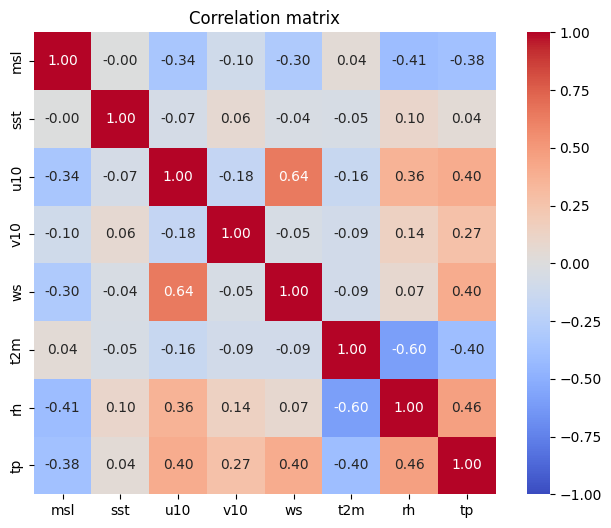

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.savefig('../reports/graphs/heatmaps/heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Print the Correlation with target

In [16]:
corr_target = corr['tp'].sort_values(ascending=False)
corr_target

tp     1.000000
rh     0.461742
u10    0.404339
ws     0.403416
v10    0.270461
sst    0.043174
msl   -0.375390
t2m   -0.404319
Name: tp, dtype: float64

Saving the Correlation with target to a excel file

In [17]:
save_dataframe_to_excel(corr_target, "../reports/information/correlation_with_tp.xlsx")

Updated file: ../reports/information/correlation_with_tp.xlsx


### Scatterplots (tp vs each feature)

A scatter plot is a type of plot that shows the relationship between two variables. Each point represents one observation in your dataset.

Link: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html


In [18]:
features = [c for c in df.columns if c != 'tp']
for col in features:
    plt.figure(figsize=(5,3))
    plt.scatter(x=df[col], y=df['tp'], alpha=0.5, c='red', edgecolor='none')
    plt.xlabel(col)
    plt.ylabel('tp')
    plt.title(f"tp vs {col}")
    filename = f'../reports/graphs/scatters/scatter_tp_vs_{col}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

In [19]:
eda_distribution = {
    "msl": {
        "shape": "Normal",
        "outliers": "Yes",
        "relationship_with_tp": "Non-linear. The scatter plot shows that the highest precipitation occurs within a mid-range of pressure values (approx. 100500-101250), not at the extremes.",
        "notes": "The distribution is approximately normal. Its relationship with precipitation is not a simple line, but confined to a specific pressure band."
    },
    "sst": {
        "shape": "Bimodal",
        "outliers": "No",
        "relationship_with_tp": "No clear relationship. Precipitation events are scattered within the two main temperature clusters, but there is no obvious trend.",
        "notes": "This feature has a bimodal distribution. It does not appear to be a strong individual predictor for the amount of precipitation."
    },
    "u10": {
        "shape": "Normal",
        "outliers": "Yes",
        "relationship_with_tp": "Weak positive relationship. The plot is very scattered, but higher precipitation is possible as the eastward wind component moves away from zero.",
        "notes": "The eastward wind component follows a normal distribution with many outliers. Its relationship with precipitation is noisy."
    },
    "v10": {
        "shape": "Normal",
        "outliers": "Yes",
        "relationship_with_tp": "Very weak relationship. The points are widely scattered with no discernible pattern connecting the northward wind component to precipitation amount.",
        "notes": "Normally distributed with many outliers. It appears to be a poor predictor of precipitation on its own."
    },
    "ws": {
        "shape": "Skewed Right",
        "outliers": "Yes",
        "relationship_with_tp": "Weak positive relationship. Higher wind speeds allow for higher precipitation, but the relationship is very scattered (heteroscedastic).",
        "notes": "Wind speed is positively skewed. Higher wind speeds are associated with a greater *possibility* of rain, but not a certainty."
    },
    "t2m": {
        "shape": "Skewed Left",
        "outliers": "Yes",
        "relationship_with_tp": "Non-linear. The highest precipitation values are concentrated in a specific temperature band (approx. 24-27°C).",
        "notes": "Temperature is slightly skewed left. Its relationship with rain is not linear; instead, there's an optimal temperature range for heavy precipitation."
    },
    "rh": {
        "shape": "Skewed Left",
        "outliers": "Yes",
        "relationship_with_tp": "Strong, non-linear positive relationship. There is a clear threshold around 75% RH, above which precipitation becomes possible and increases dramatically.",
        "notes": "Relative humidity is strongly skewed left. It is the most telling predictor, showing that high humidity is a necessary condition for rain."
    },
    "tp": {
        "shape": "Skewed Right",
        "outliers": "Yes",
        "notes": "Total precipitation is extremely skewed to the right, which is typical for rainfall data where non-rainy days (value 0) are most common."
    }
}

In [20]:
eda=pd.DataFrame(eda_distribution).T
save_dataframe_to_excel(eda, "../reports/information/eda_summary.xlsx")


Updated file: ../reports/information/eda_summary.xlsx


### Strong correlations, noticeable or interesting patterns

#### 1. Strongest linear relationships (from the heatmap):

A significant negative correlation exists between 2m air temperature (t2m) and relative humidity (rh) at approximately -0.60, reflecting the well-known physical relationship that warmer air holds more moisture and thus tends to have lower relative humidity.

A strong positive correlation is seen between wind speed (ws) and the eastward wind component (u10) at about +0.64, which is expected since ws is derived from u10 and v10.

#### 2. Target variable tp (precipitation) and predictors:

The relationship between precipitation and relative humidity (rh) is visually the most important. Precipitation is almost absent until rh crosses a threshold of around 75%, after which the likelihood and magnitude of rainfall increase sharply. This makes rh the most critical predictor in the dataset.

Both temperature (t2m) and mean sea level pressure (msl) show non-linear relationships with precipitation. The heaviest rainfall is concentrated within specific “optimal” bands (approx. t2m 24–27 °C, msl 100500–101250 Pa), rather than at extreme values.

Sea surface temperature (sst) exhibits a bimodal distribution but does not show a clear direct relationship with precipitation in the scatter plots.

#### 3. Wind components:

The individual components (u10 and v10) show diffuse scatterplots against precipitation, suggesting that wind direction alone has little predictive power for rainfall intensity.

However, overall wind speed (ws) may play a role: higher values are associated with a greater possibility of rainfall, but the relationship is weak and highly scattered (heteroscedastic).

In [21]:
info='''### Strong correlations, noticeable or interesting patterns

#### 1. Strongest linear relationships (from the heatmap):

A significant negative correlation exists between 2m air temperature (t2m) and relative humidity (rh) at approximately -0.60, reflecting the well-known physical relationship that warmer air holds more moisture and thus tends to have lower relative humidity.

A strong positive correlation is seen between wind speed (ws) and the eastward wind component (u10) at about +0.64, which is expected since ws is derived from u10 and v10.

#### 2. Target variable tp (precipitation) and predictors:

The relationship between precipitation and relative humidity (rh) is visually the most important. Precipitation is almost absent until rh crosses a threshold of around 75%, after which the likelihood and magnitude of rainfall increase sharply. This makes rh the most critical predictor in the dataset.

Both temperature (t2m) and mean sea level pressure (msl) show non-linear relationships with precipitation. The heaviest rainfall is concentrated within specific “optimal” bands (approx. t2m 24–27 °C, msl 100500–101250 Pa), rather than at extreme values.

Sea surface temperature (sst) exhibits a bimodal distribution but does not show a clear direct relationship with precipitation in the scatter plots.

#### 3. Wind components:

The individual components (u10 and v10) show diffuse scatterplots against precipitation, suggesting that wind direction alone has little predictive power for rainfall intensity.

However, overall wind speed (ws) may play a role: higher values are associated with a greater possibility of rainfall, but the relationship is weak and highly scattered (heteroscedastic).'''

In [22]:
with open("../reports/information/analysis.txt", "w") as f:
    f.write(info)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X=df.drop(columns=['tp'])
X

,msl,sst,u10,v10,ws,t2m,rh
0,101039.109583,28.272592,1.037604,0.896062,1.939804,26.803986,73.887538
1,100965.890833,28.272828,0.194436,-0.214739,1.141202,25.138509,83.937153
2,101071.947917,28.273067,0.558675,0.170728,1.734705,26.279419,74.863584
3,101039.702917,28.273300,0.808412,-2.010220,2.622524,25.128418,84.040394
4,101117.802083,28.273533,0.717091,0.712622,2.136153,26.743073,72.330746
...,...,...,...,...,...,...,...
14605,100973.963333,28.912908,0.521464,-1.403238,2.058452,26.403300,78.755252
14606,100937.531250,28.912930,0.568345,0.692294,2.213831,28.458028,67.264623
14607,100930.057083,28.912940,1.460920,0.161879,1.603188,27.781291,76.586642
14608,101036.900417,28.912960,-0.214331,0.662896,1.733335,28.328796,72.123742


In [25]:
y=df['tp']
y

0        0.103950
1        0.001431
2        0.103950
3        0.000000
4        0.000000
           ...   
14605    0.000000
14606    0.000000
14607    0.683308
14608    1.217842
14609    5.344391
Name: tp, Length: 14610, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (11688, 7)
X_test shape: (2922, 7)


In [28]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (11688, 7)
X_test_scaled shape: (2922, 7)


In [30]:
X_train

,msl,sst,u10,v10,ws,t2m,rh
13784,101072.072500,28.780758,-0.662015,-0.164904,2.138159,28.940175,72.699039
1369,101079.307083,28.916205,0.142562,-0.298918,1.205021,26.532501,86.070059
740,101205.791667,27.259958,1.250989,-1.324514,2.429117,27.829915,62.435680
8401,100538.635000,28.063515,5.045336,0.015878,5.078081,25.001139,90.401779
3509,100886.947917,28.277058,-0.159838,0.343294,0.668097,26.340353,86.923822
...,...,...,...,...,...,...,...
5191,101021.926250,28.236376,2.040812,-3.564106,4.227699,25.025553,72.481811
13418,101028.490000,28.898825,2.754026,-2.335948,4.037164,30.072286,69.583138
5390,100865.176250,28.285353,1.522905,0.892197,1.949633,28.693878,78.011280
860,101172.546667,27.575933,1.755474,-0.069731,1.994844,28.896739,72.023581


In [31]:
X_train_scaled

array([[ 0.47329165,  0.97111049, -1.44349095, ..., -0.53160591,
         1.38782551, -0.83251445],
       [ 0.51247428,  1.33911177, -0.87493745, ..., -1.43744628,
        -0.33685346,  0.57754406],
       [ 1.19751695, -3.16079323, -0.09166806, ..., -0.24915986,
         0.5925177 , -1.9148504 ],
       ...,
       [-0.64726199, -0.37486757,  0.10048072, ..., -0.71461676,
         1.21139656, -0.27230504],
       [ 1.01746146, -2.30231151,  0.26482566, ..., -0.6707288 ,
         1.35671071, -0.9037457 ],
       [-0.22827213,  2.57655757, -0.43237155, ..., -0.37218463,
        -0.56354706, -0.71707411]])